In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def get_dfs():
    modelnames = ['Watson', 'ACG', 'MACG']
    inference_types = ['EM','torch']
    init_methods = ['unif','++','dc']
    df_all = pd.DataFrame()
    for modelname in modelnames:
        for inference_type in inference_types:
            for init_method in init_methods:
                for ACG_rank in ['fullrank','lowrank']:
                    try:
                        df = pd.read_csv('../../data/results/torchvsEM_synthetic_results/Synthetic_'+inference_type+'_'+modelname+'_'+init_method+'.csv')
                    except:
                        continue
                    df = df[df['ACG_rank'] == ACG_rank]
                    df = df[df['HMM']==False]
                    df['mtype'] = inference_type+'_'+init_method+'_'+ACG_rank
                    df_all = pd.concat([df_all, df])
    return df_all

In [11]:
p=25
K=10

df_all = get_dfs()
df = df_all[(df_all['p']==p) & (df_all['K']==K)]

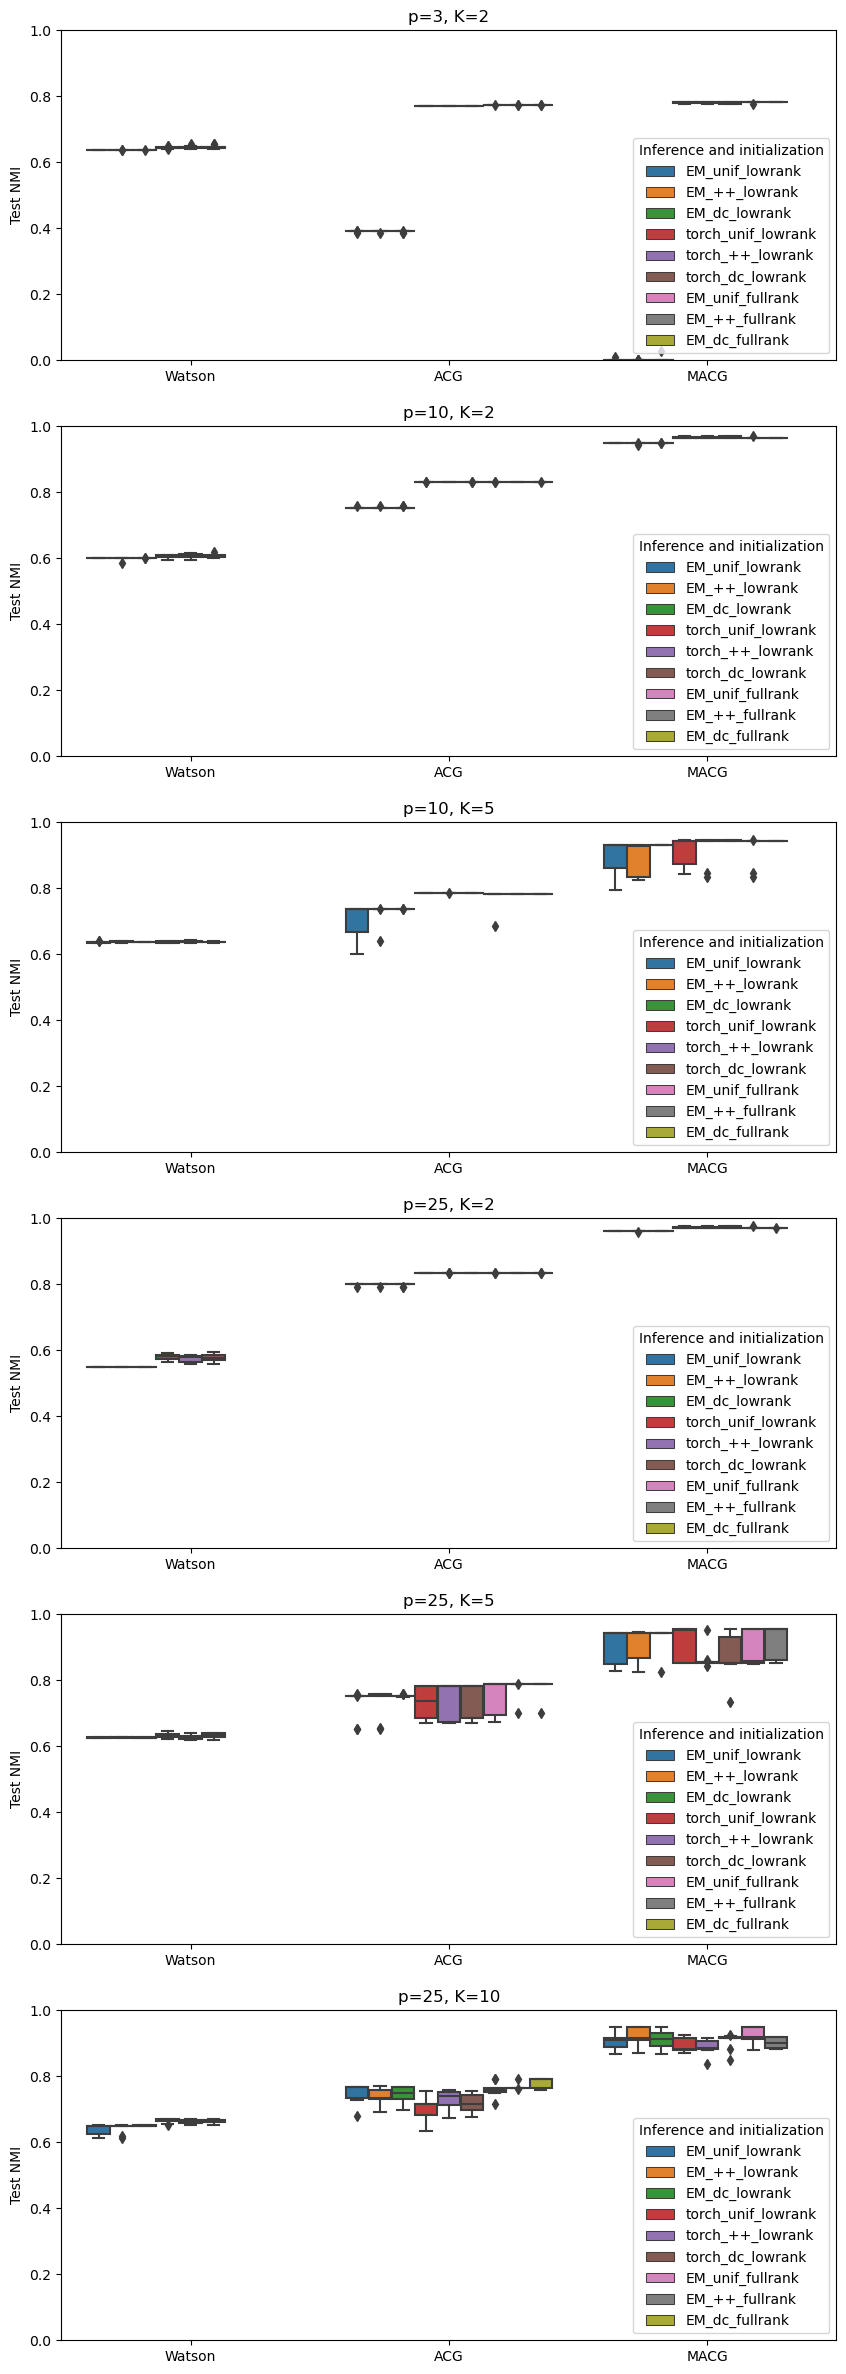

In [10]:
plt.subplots(6,1,figsize=(10,30))
df_all = get_dfs()
# df_all = df_all[df_all['ACG_rank']=='lowrank']

i=1
for p in [3,10,25]:
    for K in [2,5,10]:
        if K>=p:
            continue
        plt.subplot(6,1,i)
        df = df_all[(df_all['p']==p) & (df_all['K']==K)]
        sns.boxplot(data=df, x='modelname', y='test_NMI', hue='mtype')
        plt.title('p='+str(p)+', K='+str(K))
        plt.ylabel('Test NMI')
        plt.xlabel('')
        plt.legend(title='Inference and initialization', loc='lower right')
        plt.ylim(0,1)
        i+=1
        

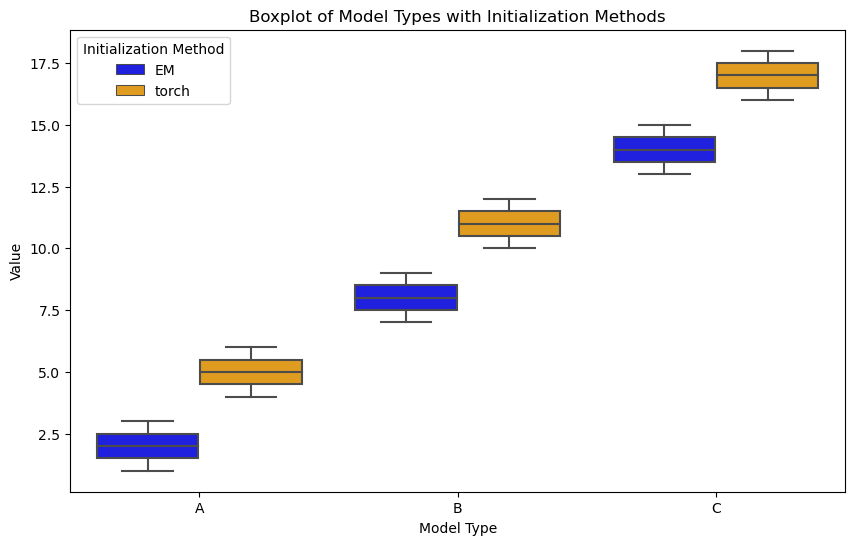

In [4]:
data = pd.DataFrame({
    'modeltype': ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C'],
    'initialization_method': ['EM', 'EM', 'EM', 'torch', 'torch', 'torch', 'EM', 'EM', 'EM', 'torch', 'torch', 'torch', 'EM', 'EM', 'EM', 'torch', 'torch', 'torch'],
    'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
})

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='modeltype', y='value', hue='initialization_method', palette={'EM': 'blue', 'torch': 'orange'})
plt.title('Boxplot of Model Types with Initialization Methods')
plt.xlabel('Model Type')
plt.ylabel('Value')
plt.legend(title='Initialization Method')
plt.show()